In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd
from scipy import stats

In [2]:
dfIris = pd.read_csv("raw_data/r_sample_iris.csv")
del dfIris['Unnamed: 0']
dfIris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


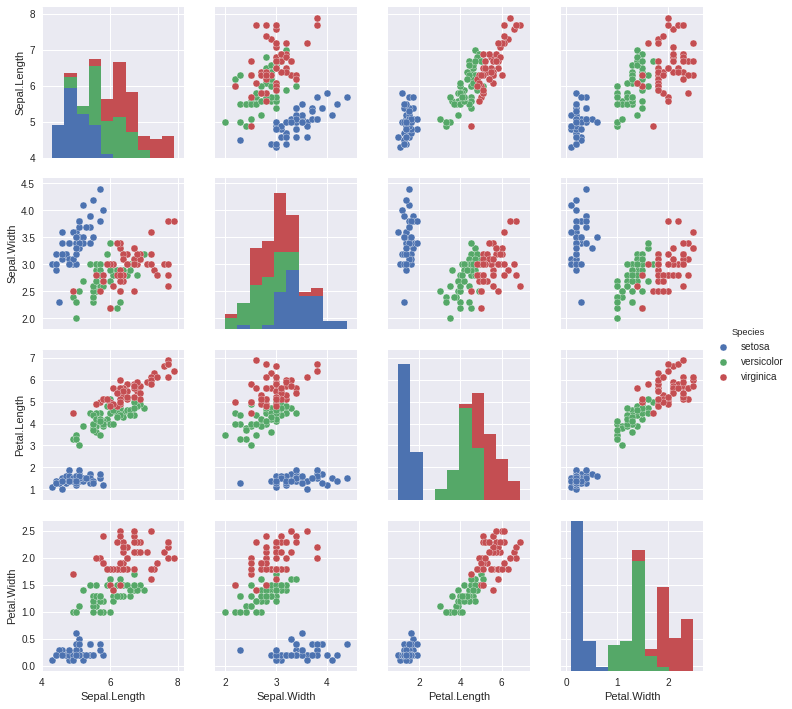

In [3]:
sns.pairplot(dfIris,hue="Species")

In [4]:
def simple_stats(series):
    return series.mean(),series.var(),series.count()

In [5]:
simple_stats(dfIris['Sepal.Width'])

(3.0573333333333337, 0.18997941834451901, 150)

In [6]:
simple_stats(dfIris[dfIris['Species']=='setosa']['Sepal.Width'])

(3.4279999999999999, 0.14368979591836739, 50)

In [7]:
for label,t in dfIris.groupby(['Species']):
    print(label,simple_stats(t['Sepal.Width']))

setosa (3.4279999999999999, 0.14368979591836739, 50)
versicolor (2.7700000000000005, 0.098469387755102056, 50)
virginica (2.9740000000000002, 0.10400408163265305, 50)


(array([  4.,   7.,  22.,  24.,  37.,  31.,  10.,  11.,   2.,   2.]),
 array([ 2.  ,  2.24,  2.48,  2.72,  2.96,  3.2 ,  3.44,  3.68,  3.92,
         4.16,  4.4 ]),
 <a list of 10 Patch objects>)

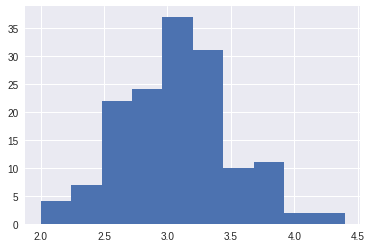

In [8]:
plt.hist(dfIris['Sepal.Width'])

Ttest_indResult(statistic=9.4549758481285959, pvalue=1.8452599454769322e-15)
Ttest_indResult(statistic=3.2057607502218186, pvalue=0.0018191004238894803)
Ttest_indResult(statistic=6.4503490896307278, pvalue=4.2463553818449899e-09)


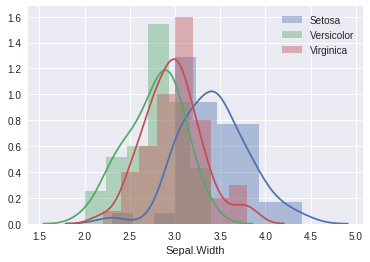

In [39]:
setosa = dfIris[dfIris['Species']=='setosa']
versicolor = dfIris[dfIris['Species']=='versicolor']
virginica = dfIris[dfIris['Species']=='virginica']
print(stats.ttest_ind(setosa['Sepal.Width'],versicolor['Sepal.Width']))
print(stats.ttest_ind(virginica['Sepal.Width'],versicolor['Sepal.Width']))
print(stats.ttest_ind(setosa['Sepal.Width'],virginica['Sepal.Width']))

sns.distplot(setosa['Sepal.Width'],label="Setosa")
sns.distplot(versicolor['Sepal.Width'],label="Versicolor")
sns.distplot(virginica['Sepal.Width'],label="Virginica")

plt.legend()

setosa (1.4620000000000002, 0.030159183673469384, 50)
versicolor (4.2599999999999998, 0.22081632653061228, 50)
virginica (5.5520000000000005, 0.30458775510204084, 50)
Ttest_indResult(statistic=-39.492719391538095, pvalue=5.4049105134416774e-62)
Ttest_indResult(statistic=12.603779441384985, pvalue=3.1788195478061495e-22)
Ttest_indResult(statistic=-49.986186257095937, pvalue=1.5048006992427275e-71)


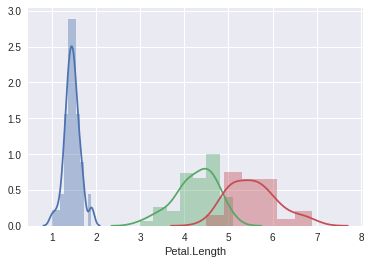

In [15]:
for label,t in dfIris.groupby(['Species']):
    print(label,simple_stats(t['Petal.Length']))

print(stats.ttest_ind(setosa['Petal.Length'],versicolor['Petal.Length']))
print(stats.ttest_ind(virginica['Petal.Length'],versicolor['Petal.Length']))
print(stats.ttest_ind(setosa['Petal.Length'],virginica['Petal.Length']))

sns.distplot(setosa['Petal.Length'])
sns.distplot(versicolor['Petal.Length'])
sns.distplot(virginica['Petal.Length'])

In [18]:
regressAll = stats.linregress(x=dfIris['Petal.Length'],y=dfIris['Sepal.Length'])
regressAll

LinregressResult(slope=0.40892227735118492, intercept=4.3066034150475812, rvalue=0.87175377588658332, pvalue=1.0386674194496941e-47, stderr=0.018891338440538176)

In [33]:
for label,t in dfIris.groupby(['Species']):
    print(label)
    regress = stats.linregress(x=t['Petal.Length'],y=t['Sepal.Length'])
    print(regress)

setosa
LinregressResult(slope=0.54229259710380284, intercept=4.2131682230342404, rvalue=0.26717575886875722, pvalue=0.060697783801134546, stderr=0.28231525574717226)
versicolor
LinregressResult(slope=0.82828096118299444, intercept=2.4075231053604438, rvalue=0.75404895859201604, pvalue=2.5861895052809548e-10, stderr=0.10413643454583578)
virginica
LinregressResult(slope=0.99573863636363658, intercept=1.0596590909090873, rvalue=0.86422473293557656, pvalue=6.2977857589036e-16, stderr=0.083667639152135778)


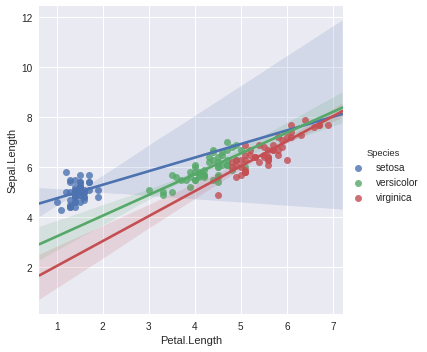

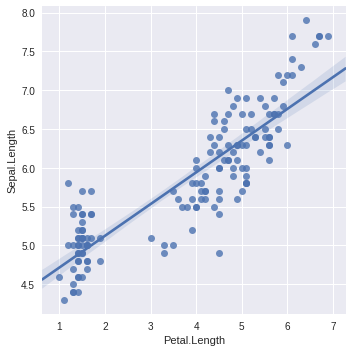

In [35]:
sns.lmplot(data=dfIris,x='Petal.Length',y='Sepal.Length',hue="Species")
sns.lmplot(data=dfIris,x='Petal.Length',y='Sepal.Length')